<a href="https://colab.research.google.com/github/andreviniciusmb/cadeia-markov/blob/main/Exercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 4 - Modelos de Markov

A <b>cadeia de Markov</b> é um <b>processo estocástico discreto no tempo</b>, ou seja, um processo sem memória, somente o <b>ontem</b> influencia no <b>hoje</b>. A fundamentação da cadeia de Markov se baseou na <b>suposição de Markov</b>, desenvolvida pelo matemático Andrei Andreyevich Markov, que de acordo com ele, tudo que aconteceu antes não importa, então se queremos avaliar um estado <b>t</b> olharemos somente o estado anterior, o estado <b>t-1</b>. \
Abaixo temos alguns exemplos de uso dos modelos de Markov:
* Previsão do clima
* Preco de uma ação na bolsa de valores
* Demanda de energia elétrica

Nos modelos de Markov temos os <b>modelos de transição</b>, que são nada mais do que as mudanças de estado do sistema, ou seja, estamos em um estado <b>t</b> e vamos para o estado <b>t+1</b> a partir de uma determinada probabilidade. As transições podem ser representadas por <b>grafos dirigidos</b> ou então por uma <b>matriz de transição</b>. No exemplo abaixo temos um grafo dirigido em que os nós <b>E</b> e <b>A</b> representam os estados e os arcos representam as transições entre os estados. 

<img src='https://upload.wikimedia.org/wikipedia/commons/2/2b/Markovkate_01.svg' alt='Grafo dirigido' width=200px height=200px/>

Nessa segunda imagem temos um exemplo de <b>matriz de transição</b> em que as linhas <b>A</b>, <b>M</b> e <b>B</b> representam os estados origem e as colunas os estados destinos, logo os elementos da matriz representam se possuem arcos de transições entre os estados, e se sim, qual probabilidade. 

<img src='https://s3.amazonaws.com/mapastatic/514db71adee2c116a6000014/imgs_Anal_Jud_Estatistica/102.png' alt='Matriz de transição' width=200px height=200px/>




### Bibliotecas
*Na  célula abaixo faremos o download e importação das bibliotecas necessárias para executação do programa.*

In [ ]:
# Fazendo download da biblioteca que usaremos para criar os modelos de Markov
!pip install pomegranate

In [ ]:
from pomegranate import *
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Atividade
*A atividade pede para:*
* *Implementar o exemplo do slide utilizando o módulo pomegranate*
* *Definir a probabilidade inicial,*
* *Definir o modelo de transição,*
* *Gerar 100 amostras.*

*A atividade se baseia no seguinte cenário: encontrar a probabilidade de amanhã ter chuva a partir do dia de hoje.*

<table height=200px width=400px>
  <tr>
    <th> </th>
    <th>Sol</th>
    <th>Chuva</th>
  </tr>
  <tr>
    <td><b>Sol</b></td>
    <td>0.4</td>
    <td>0.6</td>
  </tr>
  <tr>
    <td><b>Chuva</b></td>
    <td>0.1</td>
    <td>0.9</td>
  </tr>
</table>

*Nesse momento, vamos criar um nó que representa o <b>hoje</b> com distribuição discreta, ou seja, uma variável independente; e vamos criar também o nó <b>amanha</b>, que é condicional a hoje, ou seja, depende do que acontece hoje. \
Vale lembrar que o nó <b>hoje</b> tem como <b>probabilidade inicial</b> 50% de ter sol e 50% chuva. E a nossa <b>transição</b> está representado pelo nó <b>amanha</b> tem como probabilidade os valores apresentados na tabela acima.*

In [ ]:
hoje = DiscreteDistribution({
    "sol": 0.5,
    "chuva": 0.5
})

amanha = ConditionalProbabilityTable([
    ["sol", "sol", 0.4],
    ["sol", "chuva", 0.6],
    ["chuva", "sol", 0.1],
    ["chuva", "chuva", 0.9]
], [hoje])


*Agora, vamos criar a cadeia de Markov e <b>gerar 100 amostras</b>.*

In [ ]:
modelo = MarkovChain([hoje,amanha])
amostras = modelo.sample(100)

*Como podemos perceber abaixo, mais de <b>80% das amostras</b> tiveram como resultado da previsão, <b>chuva</b> para <b>amanhã</b>, dado que a probabilidade de ter sol e chuva hoje foram iguais.*

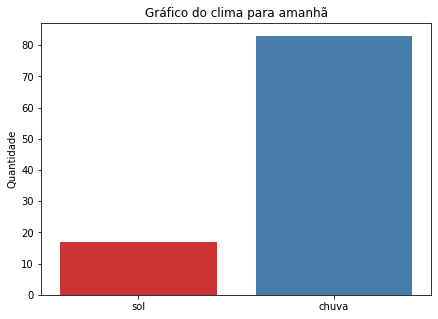

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x = amostras,palette='Set1')
plt.ylabel('Quantidade')
plt.title('Gráfico do clima para amanhã')
plt.show()

## Referências das imagens
* https://s3.amazonaws.com/mapastatic/514db71adee2c116a6000014/imgs_Anal_Jud_Estatistica/102.png
* https://upload.wikimedia.org/wikipedia/commons/2/2b/Markovkate_01.svg